<a href="https://colab.research.google.com/github/thiagodma/Cluster-Normas/blob/deep-clustering/Classificacao_Normas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [0]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
   creating: Data/medicamentos/
  inflating: Data/medicamentos/RDC 293_2019.txt  
  inflating: Data/medicamentos/RDC 278_2019.txt  
  inflating: Data/medicamentos/RDC 263_2019.txt  
  inflating: Data/medicamentos/RDC 280_2019.txt  
  inflating: Data/medicamentos/RDC 283_2019.txt  
  inflating: Data/medicamentos/RDC 268_2019.txt  
  inflating: Data/medicamentos/RDC 290_2019.txt  
  inflating: Data/medicamentos/RDC 98_2016.txt  
  inflating: Data/medicamentos/RDC 274_2004.txt  
  inflating: Data/medicamentos/RDC 53_2015.txt  
  inflating: Data/medicamentos/IN 25_2018.txt  
  inflating: Data/medicamentos/RDC 66_2014.txt  
  inflating: Data/medicamentos/RDC 08_2001.txt  
  inflating: Data/medicamentos/RDC 38_2010.txt  
  inflating: Data/medicamentos/RDC 02_2011.txt  
  inflating: Data/medicamentos/RDC 34_2008.txt  
  inflating: Data/medicamentos/RDC 55_2010.txt  
  inflating: Data/medicamentos/RDC 199_2006.txt  
  inflating: Data/medicamentos/RE 119_20

In [0]:
path = '/content/Data'
data_lm = (TextList.from_folder(path)
          .split_by_rand_pct(valid_pct=0.2)
          .label_for_lm()
          .databunch())

In [0]:
data_lm.show_batch()

idx,text
0,"técnico de referência indicado não contiver os estudos , testes , dados e informações necessários à avaliação , a xxup anvisa , xxunk os demais órgãos de registro , informará ao requerente de registro por equivalência quais produtos técnicos estão aptos a serem indicados como produto técnico de referência para o ingrediente ativo de interesse ou a alternativa de encaminhamento para o pleito de registro , no prazo de trinta"
1,"de 20 de agosto de 1977 , e na xxmaj lei nº xxunk , de 25 de maio de 2000 , cuja incidência se dará independentemente de outras infrações administrativas , civis e penais previstas na legislação ordinária . xxbos xxmaj art 1º xxmaj instituir xxmaj comissão xxmaj técnica para proceder à reavaliação toxicológica dos produtos técnicos e formulados à base dos ingredientes ativos relacionados no xxmaj anexo desta xxmaj"
2,"elaborado pela empresa solicitante do registro que apresenta uma abordagem crítica dos critérios e documentos apresentados para a avaliação da xxmaj anvisa ; \n xxup iii . petição primária matriz : petição na qual constam todas as informações e documentos necessários à solicitação de avaliação toxicológica para fins de concessão de registro de produtos técnicos , pré - misturas , agrotóxicos , afins e preservativos de madeira ; \n"
3,"reprocessamento do produto é compatível com as propriedades do produto ; \n xxup iv - o produto possui características que permitem a rastreabilidade e o controle do número de reprocessamentos ; \n v - a instituição tem acesso aos métodos indicados nesta resolução para o controle da qualidade do produto . \n xxmaj art . 5º o protocolo teste , específico para cada marca e tipo de"
4,"operação do instrumento ; \n c ) a classe de risco em que o produto se enquadra ; \n d ) descrição dos componentes do produto e , onde apropriado , descrição dos ingredientes ativos dos componentes ; \n e ) descrição da apresentação comercial e embalagem ( primária e secundária ) ; \n f ) quando aplicável , para ensaios automatizados , descrição das características"


In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


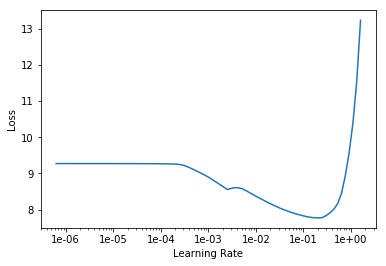

In [0]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,4.208193,3.934962,0.322399,00:59
1,3.205582,3.459142,0.357581,01:06
2,3.170476,3.430531,0.357683,01:05
3,2.984080,3.321797,0.372833,01:05
4,2.873020,3.203604,0.384915,01:05
5,2.657762,3.119288,0.395264,01:05
6,2.443702,3.008202,0.411916,01:06
7,2.248537,2.942060,0.423462,01:05
8,2.085588,2.904251,0.430986,01:05
9,2.048419,2.901101,0.431997,01:05


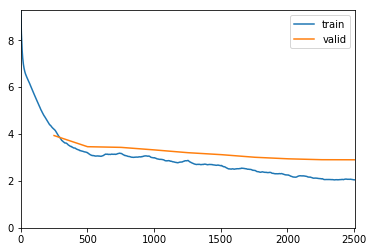

In [0]:
learn_lm.fit_one_cycle(10,2e-2,moms=(0.8,0.7))

In [0]:
learn_lm.save('learn_lm')
learn_lm.save_encoder('enc')

In [0]:
print(learn_lm.predict('Art. 1º Esta resolução visa',n_words=200,temperature=1))

Art. 1º Esta resolução visa os seguintes requisitos para os equipos : 
  I- Manter em conformidade com as normas de boas práticas de fabricação de Produtos Médicos em tratamento desde que os produtos não sejam passíveis de exportação ; 
  II- balança similar : processo média de prescrição , registro ou recebimento de produtos devolvidos à sua utilização , para apresentar plantas medicinais , quais , ou fatores de látex , estabilização , em plantas , entorpecentes ou fluidos . Pequenas alguma forma , como agrotóxico , inócuo , fungos , óleo intermediário e volátil , exsudato e gases não - medicinais , excetuando - se àquelas negrito ; 
  IV.- advertência direta : isótopos , não asc , vapor , lítio e , ainda aquelas que não identificadas , em sua ausência embalagem para venda ; 
  VII – água : preparação destinada à higienização de materiais ou superfícies de microrganismos de cosméticos , utensílios , gases , qualquer isolado de captura , tratamento , tratamento , secagem , compostagem 

In [0]:
data_lm.save('data_lm')

In [0]:
data_clas = (TextList.from_folder(path,vocab=data_lm.train_ds.vocab)
          .split_by_rand_pct(valid_pct=0.4)
          .label_from_folder()
          .databunch())

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj art 1º xxmaj esta resolução possui o objetivo de estabelecer os requisitos mínimos a serem seguidos na fabricação de medicamentos para padronizar a verificação do cumprimento das xxmaj boas xxmaj práticas de xxmaj fabricação de xxmaj medicamentos ( xxup bpf ) de uso humano durante as inspeções sanitárias . \n § 1º xxmaj fica xxunk a xxmaj resolução xxup gmc n ° 15 / 09 - """,medicamentos
"xxbos xxmaj art 1 ° xxmaj ficam estabelecidas as xxmaj boas xxmaj práticas em xxmaj células xxmaj humanas para xxmaj uso xxmaj terapêutico e pesquisa clínica , nos termos desta xxmaj resolução . \n xxup capítulo i \n xxup das xxup disposições xxup iniciais \n xxmaj seção i \n xxmaj objetivo \n xxmaj art . 2 ° xxmaj ficam padronizadas as xxmaj boas xxmaj práticas","sangue, tecidos, células e órgãos"
"xxbos xxmaj art 1 ° xxmaj aprovar a xxmaj instrução xxmaj normativa , de caráter geral e especifico , para estabelecer documentos , formulários e procedimentos na aplicação do xxmaj regulamento xxmaj técnico aprovado pela xxmaj portada xxup svs / xxup ms n. ° 344 / 98 . \n xxmaj art . 2 ° xxmaj estabelecer e coordenar programas de capacitado das xxmaj autoridades xxmaj sanitárias xxmaj estaduais ,",temas transversais
"xxbos xxmaj art 1º xxmaj fica aprovado o regulamento técnico que estabelece os requisitos mínimos para o registro , a renovação de registro , as mudanças pós - registro e a notificação de medicamentos dinamizados industrializados , nos termos desta xxmaj resolução . \n xxup capítulo i \n xxup das xxup disposições xxup iniciais \n xxmaj seção i \n xxmaj objetivo \n xxmaj art .",medicamentos
"xxbos xxmaj art 1 ° xxmaj ficam estabelecidas as xxmaj boas xxmaj práticas em xxmaj tecidos humanos para uso terapêutico , nos termos desta xxmaj resolução . \n xxup capítulo i \n xxup das xxup disposições xxup iniciais \n xxmaj seção i \n xxmaj objetivo \n xxmaj art . 2 ° xxmaj este regulamento técnico possui o objetivo de estabelecer as xxmaj boas xxmaj práticas","sangue, tecidos, células e órgãos"


In [0]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (519 items)
x: TextList
xxbos xxmaj art 1º. xxmaj os xxunk de registro de agrotóxicos por equivalência deverão encaminhar à xxup anvisa , petição específica em que manifestem o seu interesse em obter a resposta de que trata o art . 1º desta xxmaj resolução . 
  xxmaj parágrafo único . a petição deverá referir o número do processo de registro na xxup anvisa . 
  xxmaj art . 3º. xxmaj quando o produto técnico de referência indicado não contiver os estudos , testes , dados e informações necessários à avaliação , a xxup anvisa , xxunk os demais órgãos de registro , informará ao requerente de registro por equivalência quais produtos técnicos estão aptos a serem indicados como produto técnico de referência para o ingrediente ativo de interesse ou a alternativa de encaminhamento para o pleito de registro , no prazo de trinta dias após o prazo previsto no art . 1º desta xxmaj resolução . 
  xxmaj art . 4º. xxmaj compete à xxmaj gerência - xx

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


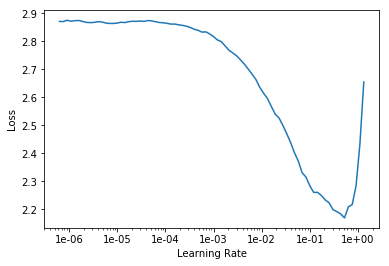

In [0]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.700760,2.746577,0.291908,01:53
1,2.392759,2.396252,0.462428,01:54
2,2.061625,1.920777,0.433526,01:55
3,1.769887,2.688965,0.349711,01:53
4,1.534844,2.185816,0.372832,01:53
5,1.352027,1.685840,0.485549,01:52
6,1.192973,1.651921,0.523121,01:53
7,1.052716,2.308045,0.491329,01:53
8,0.921397,1.578255,0.572254,01:52
9,0.829006,2.088985,0.554913,01:53


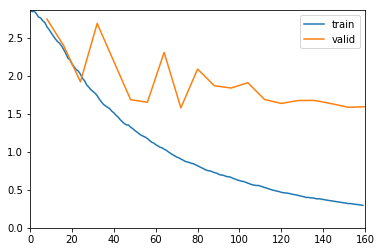

Better model found at epoch 0 with accuracy value: 0.29190751910209656.
Better model found at epoch 1 with accuracy value: 0.4624277353286743.
Better model found at epoch 5 with accuracy value: 0.48554912209510803.
Better model found at epoch 6 with accuracy value: 0.5231214165687561.
Better model found at epoch 8 with accuracy value: 0.5722543597221375.
Better model found at epoch 10 with accuracy value: 0.5838150382041931.
Better model found at epoch 13 with accuracy value: 0.6069363951683044.
Better model found at epoch 14 with accuracy value: 0.6358381509780884.


In [0]:
learn_clas.fit_one_cycle(20, 4e-2 , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [0]:
interp = ClassificationInterpretation.from_learner(learn_clas)

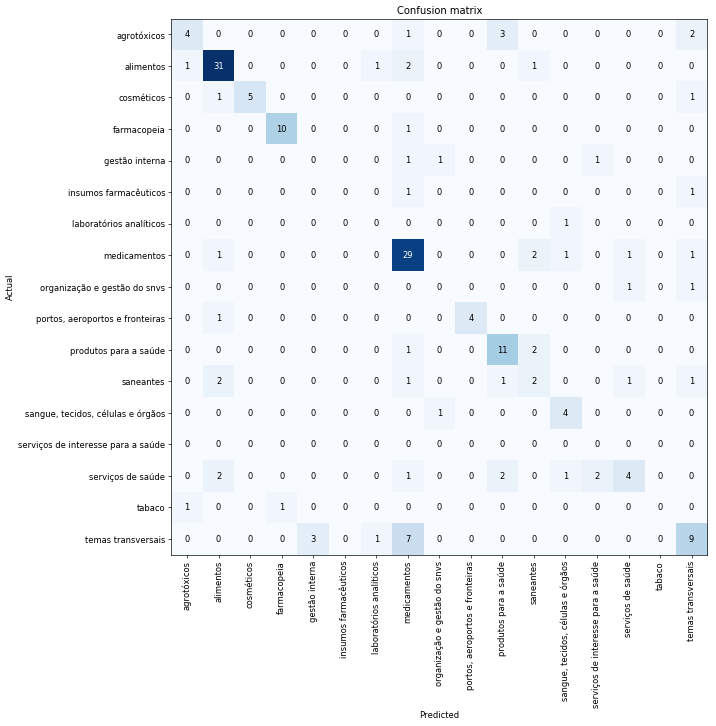

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)